## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [26]:
df = pd.read_csv('/content/drive/MyDrive/DS 3001/airbnb_hw.csv')
df_copy = df.copy()
df_clean = df_copy.loc[:, ['Review Scores Rating', 'Price', 'Beds']]
df_null = df_clean[df_clean['Review Scores Rating'].isnull()]
df_clean = df_clean.dropna(axis = 0, how = 'any')


df_clean['Price'] = df_clean['Price'].astype(str).str.replace(',', '', regex=False)
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')
df_clean.dropna(subset=['Price'], inplace=True)


df_null['Price'] = df_null['Price'].astype(str).str.replace(',', '', regex=False)
df_null['Price'] = pd.to_numeric(df_null['Price'], errors='coerce')
df_null.dropna(subset=['Price'], inplace=True)

In [24]:
X = df_clean.loc[:, ['Price', 'Beds']]
y = df_clean['Review Scores Rating']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state = 65)

k_bar = 200
SSE = []
SSE_on_train = []

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE.append(np.sum( (y_test-y_hat)**2 ))
    y_hat = fitted_model.predict(X_train)
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1
print(k_star) #k is determined based on the sum of the squared error. We want the lowest error, meaning that we want the k value where the predicted value and the real value will be the closest. Therefore by training our model we are able to determine which k value is best set for the data set

[188]


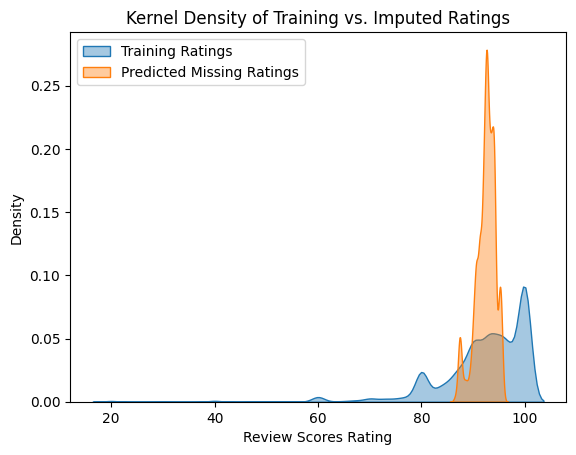

In [37]:
scaler = StandardScaler()
X_complete = scaler.fit_transform(df_clean[['Price', 'Beds']])
y_complete = df_clean['Review Scores Rating']

df_null_cleaned = df_null.dropna(subset=['Beds'])

X_missing = scaler.transform(df_null_cleaned[['Price', 'Beds']])

k_star = int(np.argmin(SSE) + 1)
knn = KNeighborsRegressor(n_neighbors = k_star)
knn.fit(X_complete, y_complete)

y_pred = knn.predict(X_missing)

sns.kdeplot(y_complete, label="Training Ratings", fill=True, alpha=0.4)
sns.kdeplot(y_pred, label="Predicted Missing Ratings", fill=True, alpha=0.4)
plt.legend()
plt.xlabel("Review Scores Rating")
plt.ylabel("Density")
plt.title("Kernel Density of Training vs. Imputed Ratings")
plt.show() #The density plot shows that the real data has a spread between 70-100, whereas the predicted missing ratings are narrowed around the average. This makes sense because the kNN model will compute based on the average of the surroudning data points, therefore you will not get a range of data points in the same fashion as the training data. The predicted model will be more narrowed and represent more of the average of the data set it was trained on. It could also mean that the bed and price was not a good training model for fitting to specific ratings and there may not be a strong enough correlation.